In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

50.05730659025788 1.0


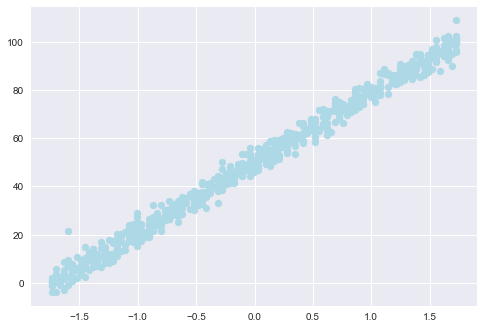

In [177]:
# Loading data

train = pd.read_csv('./train.csv')

X = train.iloc[:,0]
Y = train.iloc[:,1]

# Converted to numpy array
X = X.values
Y = Y.values

# Standardization
mu = X.mean()
X = (X-mu)/X.std()  
std = X.std()

print(mu , std)

# Visualise
plt.style.use('seaborn')
plt.scatter(X,Y, color = 'lightblue')

plt.show()

# ****Linear Regression****

In [178]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x    
    return grad/m

def error(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += ((y_ - Y[i])**2)
    return total_error/m

def gradient_descent(X,Y, lr = 0.1, max_steps = 100):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        
        error_list.append(e)
        theta_list.append((theta[0] , theta[1]))
        
        theta[0] = theta[0] - lr*grad[0]
        theta[1] = theta[1] - lr*grad[1]
        
    return theta, error_list, theta_list

In [179]:
theta, error_list, theta_list = gradient_descent(X,Y)

In [180]:
theta

array([50.00822496, 28.90721207])

In [181]:
error_list

[3344.938675618339,
 2710.979598495116,
 2197.472746025301,
 1781.5321955247525,
 1444.6203496193068,
 1171.7217544358996,
 950.6738923373357,
 771.625124037501,
 626.5956217146346,
 509.1217248331132,
 413.9678683590803,
 336.8932446151136,
 274.462799382501,
 223.8941387440845,
 182.93352362696695,
 149.75542538210215,
 122.88116580376146,
 101.11301554530563,
 83.48081383595631,
 69.19873045138335,
 57.63024290987935,
 48.25976800126097,
 40.66968332528016,
 34.52171473773562,
 29.54186018182465,
 25.50817799153675,
 22.24089541740352,
 19.59439653235561,
 17.450732435466843,
 15.714364516986947,
 14.307906503018186,
 13.168675511703512,
 12.245898408738606,
 11.49844895533706,
 10.89301489808178,
 10.402613311705013,
 10.00538802673984,
 9.68363554591803,
 9.423016036452397,
 9.211914233785205,
 9.040921773624795,
 8.902417880894845,
 8.790229727783597,
 8.699357323763493,
 8.6257506765072,
 8.566129292229595,
 8.517835970964754,
 8.478718380740219,
 8.44703313265835,
 8.4213680817

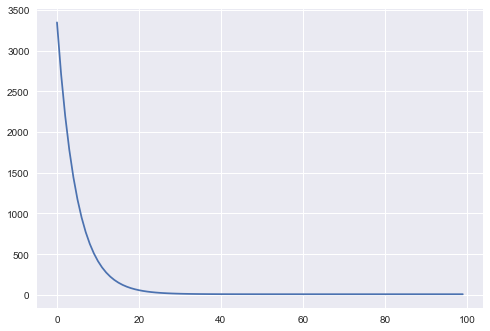

In [182]:
plt.plot(error_list)

# ****Predictions****


In [183]:
y_ = hypothesis(X, theta)


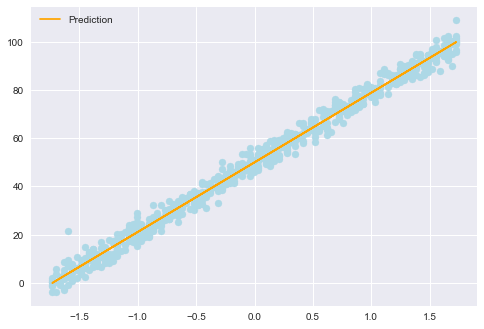

In [184]:
plt.scatter(X,Y, color = "lightblue")
plt.plot(X,y_,color = 'orange' , label = "Prediction")
plt.legend()
plt.show()

In [185]:
# Load Test data

X_test = pd.read_csv('./test.csv')
X_test = X_test.iloc[:,0].values

Y_test = hypothesis(X_test, theta)


In [186]:
df = pd.DataFrame(data = Y_test, columns = ['y'])

In [187]:
df.to_csv('Y_Predictions.csv', index = False)

# ***Computing Score***
Score : R2 or R-squared or Coefficient of Determination

In [188]:
def r2_score(Y, Y_):
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = (1-num/denom)
    return score*100


In [189]:
r2_score(Y, y_)

99.01515152019743

# Surface Plots | Visualization

In [190]:
# LOSS F'n

T0 = np.arange(0, 100, 1)
T1 = np.arange(0, 100, 1)

T0, T1 = np.meshgrid(T0,T1)

# T0.shape = T1.shape

J = np.zeros(T1.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]
        

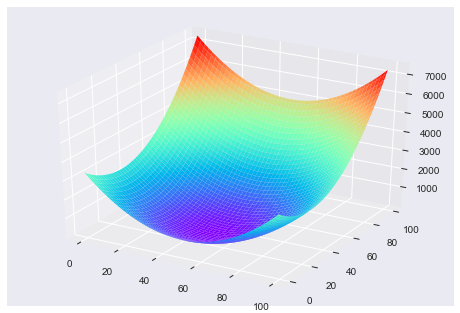

In [191]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J, cmap= 'rainbow')

plt.show()

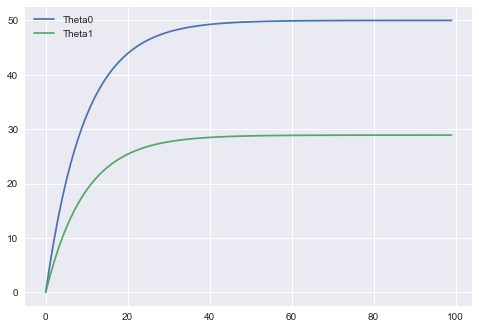

In [192]:
# THETA UPDATES

theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], label= "Theta0")
plt.plot(theta_list[:,1], label= "Theta1")
plt.legend()

plt.show()

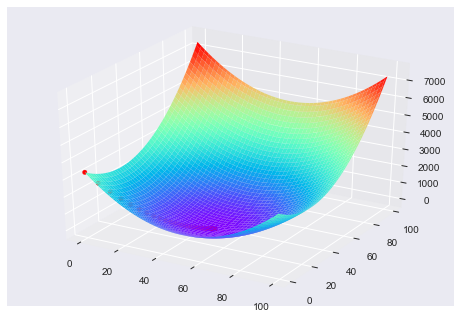

In [193]:
# Traject0ry traced by theta f'n

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J, cmap= 'rainbow')
axes.scatter(theta_list[:, 0], theta_list[:, 1], error_list, color = "red")

plt.show()

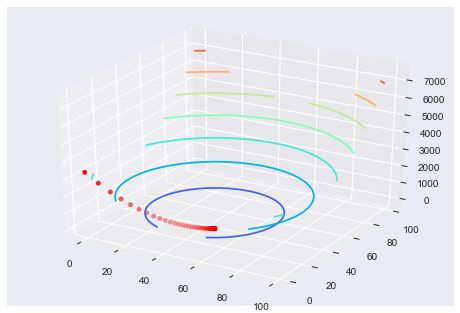

In [194]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J, cmap= 'rainbow')
axes.scatter(theta_list[:, 0], theta_list[:, 1], error_list, color = "red")

plt.show()

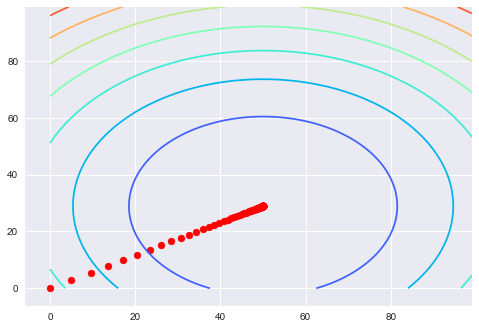

In [195]:
# 2D PLOT

plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:, 0], theta_list[:, 1],color = "red")

plt.show()

# Interactive Plots


In [196]:
np.save('ThetaList.npy' , theta_list)

In [ ]:
# theta = np.load('./ThetaList.npy')

# T0 = theta[:,0]
# T1 = theta[:,1]

# plt.ion()

# for i in range(0,50,3):
#     y_ = T1[i]*X + T0
#     plt.scatter(X,Y)
#     plt.plot(X,y_, 'red')
#     plt.draw()
#     plt.pause(1)
#     plt.clf()